In [1]:
from matplotlib import pyplot as plt
from scipy.stats import *
import seaborn as sns
import pandas as pd
import os
os.chdir(r"C:\Users\82102\Desktop\kopis 공모전")

# 2019년

## 2019년도 preprocessing

In [2]:
os.listdir("2019")

["(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_07_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_07_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_07_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_08_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_08_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_08_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_09_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_09_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_09_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_10_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_10_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_10_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_11_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_11_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_11_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2019_12_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반

In [3]:
merged_df_2019 = pd.DataFrame()

for file in os.listdir("2019"):
    if "kopis.xlsx" in file:
        df = pd.read_excel("2019/" + file) 
        merged_df_2019 = pd.concat([merged_df_2019, df], axis=0, ignore_index=True) 

In [4]:
dup_merged_df_2019 = merged_df_2019.drop_duplicates(['공연코드'])

In [5]:
# 관객수 파생변수 생성
df1 = merged_df_2019[['공연코드','예매/취소구분']].copy()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
for i in df1['공연코드'].unique().tolist():
    df2 = df1[df1['공연코드']==i].copy()
        
    cnt1 = len(df2[df2['예매/취소구분']==1]) # 예매/취소구분이 1인 개수
    cnt2 = len(df2[df2['예매/취소구분']==2]) # 예매/취소구분이 2인 개수
    df2['관객수'] = cnt1 - cnt2 # 1에서 2를 뺀 개수를 관객수
    df2 = df2.drop('예매/취소구분', axis=1)
        
    df3 = pd.concat([df3, df2], axis = 0).copy()
    df3 = df3.drop_duplicates()
    
df3 = df3.groupby('공연코드')['관객수'].sum()

In [6]:
df3 = pd.DataFrame(data=df3)
df4 = pd.merge(dup_merged_df_2019, df3, left_on='공연코드', right_on='공연코드')

In [7]:
final_2019 = df4.set_index('공연코드')

In [8]:
# 극작가명 컬럼에 각색이라는 키워드여부에 따라 각색여부 판단
row_indexes=final_2019.loc[final_2019['극작가명'].str.contains('각색', na=False)].index
final_2019.loc[row_indexes,'각색여부']=1
row_indexes=final_2019.loc[~final_2019['극작가명'].str.contains('각색', na=False)].index
final_2019.loc[row_indexes,'각색여부']=0

In [9]:
# 불필요한 컬럼 제거
final_2019.drop(['시설특성','공연일시','예매/취소구분','장당금액','공연시작일자','공연종료일자','장르명','원작자명','극작가명', 
                 '수상실적','관람연령','축제 여부','내한공연 여부','오픈런 여부','단독판매여부'], axis=1, inplace = True)
# 불필요한 용량 제거
final_2019['각색여부'] = final_2019["각색여부"].astype('int8')
final_2019['관객수'] = final_2019["관객수"].astype('int32')

In [10]:
# EDA 및 전처리가 된 상태로 파일저장
final_2019.to_excel("final_2019.xlsx")

## 2019년도 각색 여부에 따른 비율

In [11]:
final_2019 = pd.read_excel("final_2019.xlsx")
# 관객수 데이터 중 음수 제거
final_2019 = final_2019[final_2019['관객수']>0]

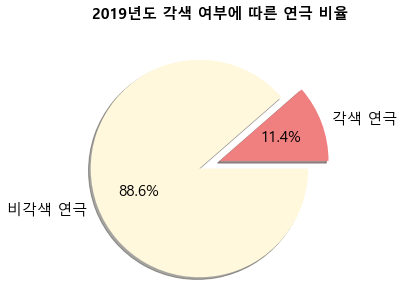

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'

ratio = [final_2019.loc[final_2019['각색여부']==1]['공연코드'].count(), 
         final_2019.loc[final_2019['각색여부']==0]['공연코드'].count()]
labels = ['각색 연극', '비각색 연극']
explode = [0, 0.2]
colors = ['#F08080', '#FFF8DC']
title_font = {'fontsize': 15, 'fontweight': 'bold'}

plt.title('2019년도 각색 여부에 따른 연극 비율', fontdict=title_font)
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, shadow=True)
plt.show()

## 2019년도 독립표본 t 검정 

In [13]:
final_2019 = pd.read_excel("final_2019.xlsx")
# 관객수 데이터 중 음수 제거
final_2019 = final_2019[final_2019['관객수']>0]

In [14]:
dramatic2019 = final_2019.loc[final_2019['각색여부']==1]
nondramatic2019 = final_2019.loc[final_2019['각색여부']==0]

In [15]:
dramatic2019_aud = dramatic2019['관객수'].values
nondramatic2019_aud = nondramatic2019['관객수'].values

In [16]:
group_dramatic2019_aud = dramatic2019_aud[dramatic2019_aud > 0]
group_nondramatic2019_aud = nondramatic2019_aud[nondramatic2019_aud > 0]

In [17]:
from scipy.stats import *
# 정규성 검정
print('원작을 각색한 연극 :',kstest(group_dramatic2019_aud, 'norm'))
print('원작을 각색하지 않은 연극 :',kstest(group_nondramatic2019_aud, 'norm'))
# 등분산성 검정
print('등분산성 검정 :',levene(group_dramatic2019_aud, group_nondramatic2019_aud))
# ttest
print('독립표본 T검정 :',ttest_ind(group_dramatic2019_aud, group_nondramatic2019_aud, equal_var=False))

원작을 각색한 연극 : KstestResult(statistic=0.9513528046710726, pvalue=9.673547351549821e-195)
원작을 각색하지 않은 연극 : KstestResult(statistic=0.9598282652643644, pvalue=0.0)
등분산성 검정 : LeveneResult(statistic=11.261455527724259, pvalue=0.000814276275903258)
독립표본 T검정 : Ttest_indResult(statistic=1.5347759292769376, pvalue=0.12694454886747905)


## 2019년도 각색 여부에 따른 평균 관객수 비교

In [18]:
final_2019 = pd.read_excel("final_2019.xlsx")
# 관객수 데이터 중 음수 제거
final_2019 = final_2019[final_2019['관객수']>0]

Text(0, 0.5, '평균 관객수(명)')

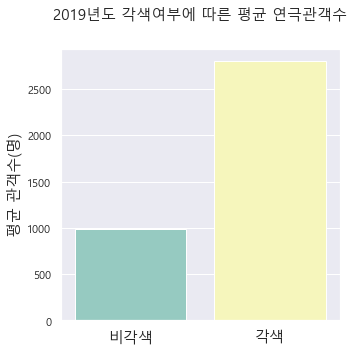

In [19]:
%matplotlib inline

plt.rcParams["figure.figsize"]=(5, 5)
sns.set_style('whitegrid')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
g=sns.barplot(x='각색여부', y='관객수', palette='Set3',data=final_2019, ci=None)
g.set_xticklabels(['비각색','각색'], fontsize = 15)
g.set_title('2019년도 각색여부에 따른 평균 연극관객수',fontsize = 15, pad=30)
plt.xlabel('', fontsize = 15)
plt.ylabel('평균 관객수(명)', fontsize = 15)

# 2020

## 2020년도 preprocessing

In [20]:
os.listdir("2020")

["(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_01_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_01_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_01_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_02_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_02_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_03_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_04_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_05_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_06_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_07_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_07_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_08_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_08_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_09_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_10_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2020_11_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반

In [21]:
merged_df_2020 = pd.DataFrame()

for file in os.listdir("2020"):
    if "kopis.xlsx" in file:
        df = pd.read_excel("2020/" + file) 
        merged_df_2020 = pd.concat([merged_df_2020, df], axis=0, ignore_index=True)

In [22]:
dup_merged_df_2020 = merged_df_2020.drop_duplicates(['공연코드'])

In [23]:
# 관객수 파생변수 생성
df1 = merged_df_2020[['공연코드','예매/취소구분']].copy()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
for i in df1['공연코드'].unique().tolist():
    df2 = df1[df1['공연코드']==i].copy()
        
    cnt1 = len(df2[df2['예매/취소구분']==1]) # 예매/취소구분이 1인 개수
    cnt2 = len(df2[df2['예매/취소구분']==2]) # 예매/취소구분이 2인 개수
    df2['관객수'] = cnt1 - cnt2 # 1에서 2를 뺀 개수를 관객수로 명명
    df2 = df2.drop('예매/취소구분', axis=1)
        
    df3 = pd.concat([df3, df2], axis = 0).copy()
    df3 = df3.drop_duplicates()
    
df3 = df3.groupby('공연코드')['관객수'].sum()

In [24]:
df3 = pd.DataFrame(data=df3)
df4 = pd.merge(dup_merged_df_2020, df3, left_on='공연코드', right_on='공연코드')

In [25]:
final_2020 = df4.set_index('공연코드')

In [26]:
# 극작가명 컬럼에 각색이라는 키워드여부에 따라 각색여부 판단
row_indexes=final_2020.loc[final_2020['극작가명'].str.contains('각색', na=False)].index
final_2020.loc[row_indexes,'각색여부']=1
row_indexes=final_2020.loc[~final_2020['극작가명'].str.contains('각색', na=False)].index
final_2020.loc[row_indexes,'각색여부']=0

In [27]:
# 불필요한 컬럼 제거
final_2020.drop(['시설특성','공연일시','예매/취소구분','장당금액','공연시작일자','공연종료일자','장르명','원작자명','극작가명', 
                 '수상실적','관람연령','축제 여부','내한공연 여부','오픈런 여부','단독판매여부'], axis=1, inplace = True)
# 불필요한 용량 제거
final_2020['각색여부'] = final_2020["각색여부"].astype('int8')
final_2020['관객수'] = final_2020["관객수"].astype('int32')

In [28]:
# EDA 및 전처리가 된 상태로 파일저장
final_2020.to_excel("final_2020.xlsx")

## 2020년도 각색 여부에 따른 비율

In [29]:
final_2020 = pd.read_excel("final_2020.xlsx")
# 관객수 데이터 중 음수 제거
final_2020 = final_2020[final_2020['관객수']>0]

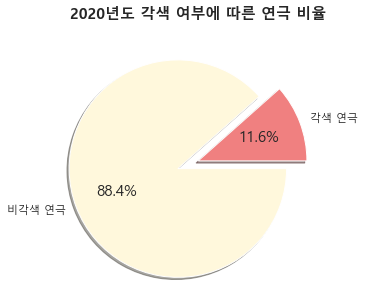

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'

ratio = [final_2020.loc[final_2020['각색여부']==1]['공연코드'].count(), 
         final_2020.loc[final_2020['각색여부']==0]['공연코드'].count()]
labels = ['각색 연극', '비각색 연극']
explode = [0, 0.2]
colors = ['#F08080', '#FFF8DC']
title_font = {'fontsize': 15, 'fontweight': 'bold'}

plt.title('2020년도 각색 여부에 따른 연극 비율', fontdict=title_font)
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, shadow=True)
plt.show()

## 2020년도 독립표본 t 검정

In [31]:
final_2020 = pd.read_excel("final_2020.xlsx")
# 관객수 데이터 중 음수 제거
final_2020 = final_2020[final_2020['관객수']>0]

In [32]:
dramatic2020 = final_2020.loc[final_2020['각색여부']==1]
nondramatic2020 = final_2020.loc[final_2020['각색여부']==0]

In [33]:
dramatic2020_aud = dramatic2020['관객수'].values
nondramatic2020_aud = nondramatic2020['관객수'].values

In [34]:
group_dramatic2020_aud = dramatic2020_aud[dramatic2020_aud > 0]
group_nondramatic2020_aud = nondramatic2020_aud[nondramatic2020_aud > 0]

In [35]:
# 정규성 검정
print('원작을 각색한 연극 :',kstest(group_dramatic2020_aud, 'norm'))
print('원작을 각색하지 않은 연극 :',kstest(group_nondramatic2020_aud, 'norm'))
# 등분산성 검정
print('등분산성 검정 :',levene(group_dramatic2020_aud, group_nondramatic2020_aud))
# ttest
print('독립표본 T검정 :',ttest_ind(group_dramatic2020_aud, group_nondramatic2020_aud, equal_var=False))

원작을 각색한 연극 : KstestResult(statistic=0.9500389908572587, pvalue=8.015371904574603e-188)
원작을 각색하지 않은 연극 : KstestResult(statistic=0.9550929331843409, pvalue=0.0)
등분산성 검정 : LeveneResult(statistic=7.2009942814568895, pvalue=0.007382973377467101)
독립표본 T검정 : Ttest_indResult(statistic=1.2607309804023248, pvalue=0.2094075514573596)


## 2020년도 각색 여부에 따른 평균 관객수 비교

In [36]:
final_2020 = pd.read_excel("final_2020.xlsx")
# 관객수 데이터 중 음수 제거
final_2020 = final_2020[final_2020['관객수']>0]

Text(0, 0.5, '평균 관객수(명)')

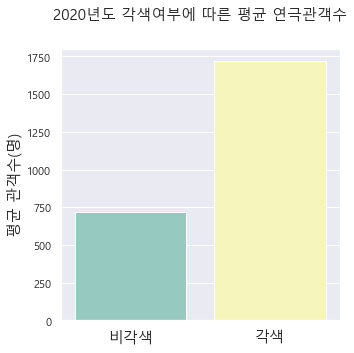

In [37]:
%matplotlib inline

plt.rcParams["figure.figsize"]=(5, 5)
sns.set_style('whitegrid')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
g=sns.barplot(x='각색여부', y='관객수', palette='Set3',data=final_2020, ci=None)
g.set_xticklabels(['비각색','각색'], fontsize = 15)
g.set_title('2020년도 각색여부에 따른 평균 연극관객수',fontsize = 15, pad=30)
plt.xlabel('', fontsize = 15)
plt.ylabel('평균 관객수(명)', fontsize = 15)

# 2021

## 2021년도 preprocessing

In [38]:
os.listdir("2021")

["(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_01_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_02_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_03_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_04_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_04_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_05_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_05_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_06_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_06_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_07_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_07_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_07_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_08_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_08_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_09_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2021_09_16_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반

In [39]:
merged_df_2021 = pd.DataFrame()

for file in os.listdir("2021"):
    if "kopis.xlsx" in file:
        df = pd.read_excel("2021/" + file) 
        merged_df_2021 = pd.concat([merged_df_2021, df], axis=0, ignore_index=True)

In [40]:
dup_merged_df_2021 = merged_df_2021.drop_duplicates(['공연코드'])

In [41]:
# 관객수 파생변수 생성
df1 = merged_df_2021[['공연코드','예매/취소구분']].copy()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
for i in df1['공연코드'].unique().tolist():
    df2 = df1[df1['공연코드']==i].copy()
        
    cnt1 = len(df2[df2['예매/취소구분']==1]) # 예매/취소구분이 1인 개수
    cnt2 = len(df2[df2['예매/취소구분']==2]) # 예매/취소구분이 2인 개수
    df2['관객수'] = cnt1 - cnt2 # 1에서 2를 뺀 개수를 관객수로 명명
    df2 = df2.drop('예매/취소구분', axis=1)
        
    df3 = pd.concat([df3, df2], axis = 0).copy()
    df3 = df3.drop_duplicates()
    
df3 = df3.groupby('공연코드')['관객수'].sum()

In [42]:
df3 = pd.DataFrame(data=df3)
df4 = pd.merge(dup_merged_df_2021, df3, left_on='공연코드', right_on='공연코드')

In [43]:
final_2021 = df4.set_index('공연코드')

In [44]:
# 극작가명 컬럼에 각색이라는 키워드여부에 따라 각색여부 판단
row_indexes=final_2021.loc[final_2021['극작가명'].str.contains('각색', na=False)].index
final_2021.loc[row_indexes,'각색여부']=1
row_indexes=final_2021.loc[~final_2021['극작가명'].str.contains('각색', na=False)].index
final_2021.loc[row_indexes,'각색여부']=0

In [45]:
# 불필요한 컬럼 제거
final_2021.drop(['시설특성','공연일시','예매/취소구분','장당금액','공연시작일자','공연종료일자','장르명','원작자명','극작가명', 
                 '수상실적','관람연령','축제 여부','내한공연 여부','오픈런 여부','단독판매여부'], axis=1, inplace = True)
# 불필요한 용량 제거
final_2021['각색여부'] = final_2021["각색여부"].astype('int8')
final_2021['관객수'] = final_2021["관객수"].astype('int32')

In [46]:
# EDA 및 전처리가 된 상태로 파일저장
final_2021.to_excel("final_2021.xlsx")

## 2021년도 각색 여부에 따른 비율

In [47]:
final_2021 = pd.read_excel("final_2021.xlsx")
# 관객수 데이터 중 음수 제거
final_2021 = final_2021[final_2021['관객수'] > 0]

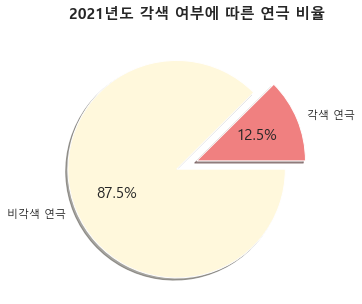

In [48]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'

ratio = [final_2021.loc[final_2021['각색여부']==1]['공연코드'].count(), 
         final_2021.loc[final_2021['각색여부']==0]['공연코드'].count()]
labels = ['각색 연극', '비각색 연극']
explode = [0, 0.2]
colors = ['#F08080', '#FFF8DC']
title_font = {'fontsize': 15, 'fontweight': 'bold'}

plt.title('2021년도 각색 여부에 따른 연극 비율', fontdict=title_font)
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, shadow=True)
plt.show()

## 2021년도 독립표본 t 검정

In [49]:
final_2021 = pd.read_excel("final_2021.xlsx")
# 관객수 데이터 중 음수 제거
final_2021 = final_2021[final_2021['관객수'] > 0]

In [50]:
dramatic2021 = final_2021.loc[final_2021['각색여부']==1]
nondramatic2021 = final_2021.loc[final_2021['각색여부']==0]

In [51]:
dramatic2021_aud = dramatic2021['관객수'].values
nondramatic2021_aud = nondramatic2021['관객수'].values

In [52]:
group_dramatic2021_aud = dramatic2021_aud[dramatic2021_aud > 0]
group_nondramatic2021_aud = nondramatic2021_aud[nondramatic2021_aud > 0]

In [53]:
# 정규성 검정
print('원작을 각색한 연극 :',kstest(group_dramatic2021_aud, 'norm'))
print('원작을 각색하지 않은 연극 :',kstest(group_nondramatic2021_aud, 'norm'))
# 등분산성 검정
print('등분산성 검정 :',levene(group_dramatic2021_aud, group_nondramatic2021_aud))
# ttest
print('독립표본 T검정 :',ttest_ind(group_dramatic2021_aud, group_nondramatic2021_aud, equal_var=False))

원작을 각색한 연극 : KstestResult(statistic=0.9689511128650988, pvalue=0.0)
원작을 각색하지 않은 연극 : KstestResult(statistic=0.960720942431986, pvalue=0.0)
등분산성 검정 : LeveneResult(statistic=1.9435288282345646, pvalue=0.16344611443868995)
독립표본 T검정 : Ttest_indResult(statistic=1.0029341615382636, pvalue=0.31680165042437997)


## 2021년도 각색 여부에 따른 평균 관객수 비교

In [54]:
final_2021 = pd.read_excel("final_2021.xlsx")
# 관객수 데이터 중 음수 제거
final_2021 = final_2021[final_2021['관객수'] > 0]

Text(0, 0.5, '평균 관객수(명)')

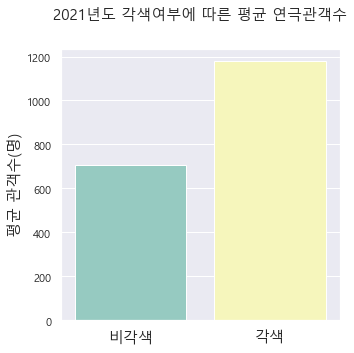

In [55]:
%matplotlib inline

plt.rcParams["figure.figsize"]=(5, 5)
sns.set_style('whitegrid')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
g=sns.barplot(x='각색여부', y='관객수', palette='Set3',data=final_2021, ci=None)
g.set_xticklabels(['비각색','각색'], fontsize = 15)
g.set_title('2021년도 각색여부에 따른 평균 연극관객수',fontsize = 15, pad=30)
plt.xlabel('', fontsize = 15)
plt.ylabel('평균 관객수(명)', fontsize = 15)

# 2022

## 2022년도 preprocessing

In [56]:
os.listdir("2022")

["(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_01_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_01_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_01_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_02_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_02_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_02_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_03_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_03_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_03_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_04_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_04_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_04_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_05_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_05_11_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_05_21_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_06_01_kopis.xlsx",
 "(데이터)'19년 하반기~ '22년 상반

In [57]:
merged_df_2022 = pd.DataFrame()

for file in os.listdir("2022"):
    if "kopis.xlsx" in file:
        df = pd.read_excel("2022/" + file) 
        merged_df_2022 = pd.concat([merged_df_2022, df], axis=0, ignore_index=True)

In [58]:
dup_merged_df_2022 = merged_df_2022.drop_duplicates(['공연코드'])

In [59]:
# 관객수 파생변수 생성
df1 = merged_df_2022[['공연코드','예매/취소구분']].copy()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
for i in df1['공연코드'].unique().tolist():
    df2 = df1[df1['공연코드']==i].copy()
        
    cnt1 = len(df2[df2['예매/취소구분']==1]) # 예매/취소구분이 1인 개수
    cnt2 = len(df2[df2['예매/취소구분']==2]) # 예매/취소구분이 2인 개수
    df2['관객수'] = cnt1 - cnt2 # 1에서 2를 뺀 개수를 관객수로 명명
    df2 = df2.drop('예매/취소구분', axis=1)
        
    df3 = pd.concat([df3, df2], axis = 0).copy()
    df3 = df3.drop_duplicates()
    
df3 = df3.groupby('공연코드')['관객수'].sum()

In [60]:
df3 = pd.DataFrame(data=df3)
df4 = pd.merge(dup_merged_df_2022, df3, left_on='공연코드', right_on='공연코드')

In [61]:
final_2022 = df4.set_index('공연코드')

In [62]:
# 극작가명 컬럼에 각색이라는 키워드여부에 따라 각색여부 판단
row_indexes=final_2022.loc[final_2022['극작가명'].str.contains('각색', na=False)].index
final_2022.loc[row_indexes,'각색여부']=1
row_indexes=final_2022.loc[~final_2022['극작가명'].str.contains('각색', na=False)].index
final_2022.loc[row_indexes,'각색여부']=0

In [63]:
# 불필요한 컬럼 제거
final_2022.drop(['시설특성','공연일시','예매/취소구분','장당금액','공연시작일자','공연종료일자','장르명','원작자명','극작가명', 
                 '수상실적','관람연령','축제 여부','내한공연 여부','오픈런 여부','단독판매여부'], axis=1, inplace = True)
# 불필요한 용량 제거
final_2022['각색여부'] = final_2022["각색여부"].astype('int8')
final_2022['관객수'] = final_2022["관객수"].astype('int32')

In [64]:
# EDA 및 전처리가 된 상태로 파일저장
final_2022.to_excel("final_2022.xlsx")

## 2022년도 각색 여부에 따른 비율

In [65]:
final_2022 = pd.read_excel("final_2022.xlsx")
# 관객수 데이터 중 음수 제거
final_2022 = final_2022[final_2022['관객수'] > 0]

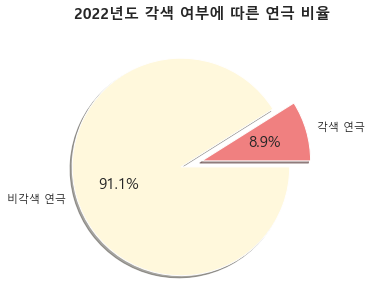

In [66]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'

ratio = [final_2022.loc[final_2022['각색여부']==1]['공연코드'].count(), 
         final_2022.loc[final_2022['각색여부']==0]['공연코드'].count()]
labels = ['각색 연극', '비각색 연극']
explode = [0, 0.2]
colors = ['#F08080', '#FFF8DC']
title_font = {'fontsize': 15, 'fontweight': 'bold'}

plt.title('2022년도 각색 여부에 따른 연극 비율', fontdict=title_font)
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, shadow=True)
plt.show()

## 2022년도 독립표본 t 검정

In [67]:
final_2022 = pd.read_excel("final_2022.xlsx")
# 관객수 데이터 중 음수 제거
final_2022 = final_2022[final_2022['관객수'] > 0]

In [68]:
dramatic2022 = final_2022.loc[final_2022['각색여부']==1]
nondramatic2022 = final_2022.loc[final_2022['각색여부']==0]

In [69]:
dramatic2022_aud = dramatic2022['관객수'].values
nondramatic2022_aud = nondramatic2022['관객수'].values

In [70]:
group_dramatic2022_aud = dramatic2022_aud[dramatic2022_aud > 0]
group_nondramatic2022_aud = nondramatic2022_aud[nondramatic2022_aud > 0]

In [71]:
# 정규성 검정
print('원작을 각색한 연극 :',kstest(group_dramatic2022_aud, 'norm'))
print('원작을 각색하지 않은 연극 :',kstest(group_nondramatic2022_aud, 'norm'))
# 등분산성 검정
print('등분산성 검정 :',levene(group_dramatic2022_aud, group_nondramatic2022_aud))
# ttest
print('독립표본 T검정 :',ttest_ind(group_dramatic2022_aud, group_nondramatic2022_aud, equal_var=False))

원작을 각색한 연극 : KstestResult(statistic=0.9986501019683699, pvalue=1.3062010048573505e-238)
원작을 각색하지 않은 연극 : KstestResult(statistic=0.9714633407390555, pvalue=0.0)
등분산성 검정 : LeveneResult(statistic=0.9130735438782299, pvalue=0.33954934525235714)
독립표본 T검정 : Ttest_indResult(statistic=0.6657920853454411, pvalue=0.5072760427150905)


## 2022년도 각색 여부에 따른 평균 관객수 비교

In [72]:
final_2022 = pd.read_excel("final_2022.xlsx")
# 관객수 데이터 중 음수 제거
final_2022 = final_2022[final_2022['관객수'] > 0]

Text(0, 0.5, '평균 관객수(명)')

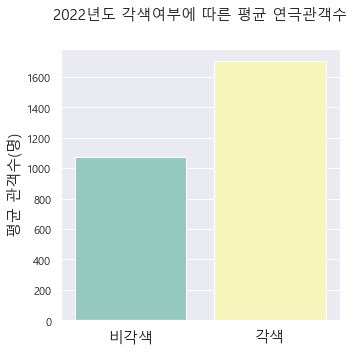

In [73]:
%matplotlib inline

plt.rcParams["figure.figsize"]=(5, 5)
sns.set_style('whitegrid')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
g=sns.barplot(x='각색여부', y='관객수', palette='Set3',data=final_2022, ci=None)
g.set_xticklabels(['비각색','각색'], fontsize = 15)
g.set_title('2022년도 각색여부에 따른 평균 연극관객수',fontsize = 15, pad=30)
plt.xlabel('', fontsize = 15)
plt.ylabel('평균 관객수(명)', fontsize = 15)

# 2019 ~ 2022 파일 병합

In [74]:
file2019 = pd.read_excel("final_2019.xlsx")
file2020 = pd.read_excel("final_2020.xlsx")
file2021 = pd.read_excel("final_2021.xlsx")
file2022 = pd.read_excel("final_2022.xlsx")
result = pd.concat([file2019, file2020, file2021, file2022])
# 불필요한 용량 제거
result['각색여부'] = result['각색여부'].astype('int8')
result['관객수'] = result['관객수'].astype('int32')

In [75]:
result['최종 관객수'] = result.groupby("공연코드")['관객수'].transform('sum')

In [76]:
result = result.reset_index(drop=True)
result = result.drop_duplicates('공연코드')
result = result.set_index('공연코드')
# 최종 관객수 데이터 중 음수 제거
result = result.loc[result["최종 관객수"] > 0]

In [77]:
result.to_excel("result.xlsx")

## 2019 ~ 2022 파일 각색 여부에 따른 비율

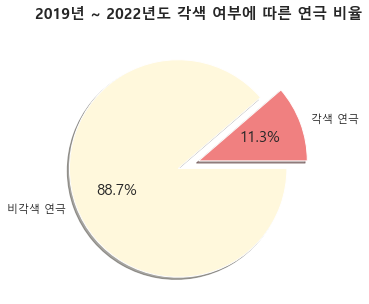

In [78]:
result = pd.read_excel("result.xlsx")

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'

ratio = [result.loc[result['각색여부']==1]['공연코드'].count(), 
         result.loc[result['각색여부']==0]['공연코드'].count()]
labels = ['각색 연극', '비각색 연극']
explode = [0, 0.2]
colors = ['#F08080', '#FFF8DC']
title_font = {'fontsize': 15, 'fontweight': 'bold'}

plt.title('2019년 ~ 2022년도 각색 여부에 따른 연극 비율', fontdict=title_font)
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, shadow=True)
plt.show()

## 2019 ~ 2022파일 독립표본 t 검정

In [79]:
result = pd.read_excel("result.xlsx")

In [80]:
result_dramatic = result.loc[result['각색여부']==1]
result_nondramatic = result.loc[result['각색여부']==0]

In [81]:
result_dramatic_aud = result_dramatic['최종 관객수'].values
result_nondramatic_aud = result_nondramatic['최종 관객수'].values

In [82]:
# 정규성 검정
print('원작을 각색한 연극 :',kstest(result_dramatic_aud, 'norm'))
print('원작을 각색하지 않은 연극 :',kstest(result_nondramatic_aud, 'norm'))
# 등분산성 검정
print('등분산성 검정 :',levene(result_dramatic_aud, result_nondramatic_aud))
# ttest
print('독립표본 T검정 :',ttest_ind(result_dramatic_aud, result_nondramatic_aud, equal_var=False))

원작을 각색한 연극 : KstestResult(statistic=0.9583819435235189, pvalue=0.0)
원작을 각색하지 않은 연극 : KstestResult(statistic=0.9579812015311289, pvalue=0.0)
등분산성 검정 : LeveneResult(statistic=6.592889791738548, pvalue=0.010266660946426845)
독립표본 T검정 : Ttest_indResult(statistic=1.2646174665795302, pvalue=0.20649984355124035)


## 2019~ 2022파일 각색 여부에 따른 평균 관객수 비교

Text(0, 0.5, '평균 관객수(명)')

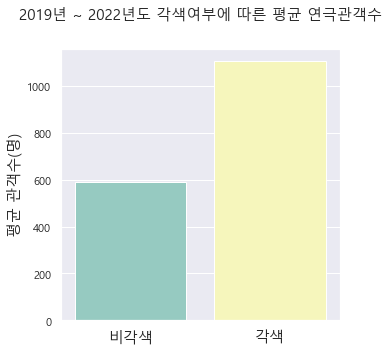

In [83]:
result = pd.read_excel("result.xlsx")

%matplotlib inline

plt.rcParams["figure.figsize"]=(5, 5)
sns.set_style('whitegrid')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
g=sns.barplot(x='각색여부', y='관객수', palette='Set3',data=result, ci=None)
g.set_xticklabels(['비각색','각색'], fontsize = 15)
g.set_title('2019년 ~ 2022년도 각색여부에 따른 평균 연극관객수',fontsize = 15, pad=30)
plt.xlabel('', fontsize = 15)
plt.ylabel('평균 관객수(명)', fontsize = 15)